**Цель работы:**

Изучение алгоритмов и методов регрессии на практике .

### Описание предметной области

Вариант №1

Набор данных: regression.xlsx, salary.csv

Атрибуты: dtypes – тип значений в столбцах,
columns – список с названиями столбцов,
shape – размер таблицы, содержит кортеж из количества строк и столбцов.


### 1.Простая линейная регрессия 

Загружаем набор данных regression.xlsx с помощью библиотеки pandas openpyxl

In [158]:
import pandas as pd

df = pd.read_excel("regression.xlsx")
print(df.head())

         x1        x2         y
0  1.929428  1.511727  5.734255
1 -0.330281 -0.898878 -0.623706
2  0.688773  0.908247  1.028884
3 -0.008892 -0.518823 -0.894802
4 -1.698716  0.610347  2.822400


Создаются две модели линейной регрессии. Первая модель (model_1) обучается на одном признаке "x1", для которого данные предварительно преобразуются в двумерный массив и переформируются в формат, требуемый scikit-learn. Переменная "y" используется как целевая переменная для обучения. 

In [159]:
from sklearn.linear_model import LinearRegression
import numpy as np
x1 = df[["x1"]].values
x2 = df[["x2"]].values
y = df['y'].values
model_1 = LinearRegression ()
model_2 = LinearRegression()
model_1.fit(np.array(x1).reshape(-1,1), y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Вторая модель (model_2) инициализирована и обучена.

In [160]:
model_2.fit(np.array(x2).reshape(-1,1), y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


С помощью predict() выполняется предсказание значений для соответствующих значений X1, на основе обученной модели линейной регрессии. Создается датафрейм с актуальными и предсказанными значениями.

In [161]:
y_predict=model_1.predict(np.array(x1).reshape(-1, 1))
predict_1=pd.DataFrame({'Actual': y, 'Predicted': y_predict})
predict_1

,Actual,Predicted
0,5.734255,1.412975
1,-0.623706,1.314354
2,1.028884,1.358829
3,-0.894802,1.328381
4,2.822400,1.254632
...,...,...
995,2.484801,1.248727
996,1.452523,1.326870
997,0.389341,1.285069
998,0.345363,1.308702


С помощью predict() выполняется предсказание значений для соответствующих значений X2, на основе обученной второй модели линейной регрессии. Создается датафрейм с актуальными и предсказанными значениями.

In [162]:
y_predict_2=model_2.predict(np.array(x2).reshape(-1, 1))
predict_2=pd.DataFrame({'Actual': y, 'Predicted': y_predict_2})
predict_2

,Actual,Predicted
0,5.734255,2.549342
1,-0.623706,0.602974
2,1.028884,2.062081
3,-0.894802,0.909838
4,2.822400,1.821551
...,...,...
995,2.484801,0.685537
996,1.452523,2.532040
997,0.389341,0.301583
998,0.345363,1.591217


In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
RMSE= np.sqrt(MSE)
R2_1 = r2_score(y, y_predict)

print("MSE:", MSE)
print("MAE:", MAE)
print("RMSE:", RMSE)
print("R2:", R2_1)


MSE: 2.6062572567108337
MAE: 1.315220878253546
RMSE: 1.6143906766055216
R2: 0.0009734863147641271


In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

MSE2 = mean_squared_error(y, y_predict_2)
MAE2 = mean_absolute_error(y, y_predict_2)
RMSE2= np.sqrt(MSE2)
R2_2 = r2_score(y, y_predict_2)

print("MSE:", MSE2)
print("MAE:", MAE2)
print("RMSE:", RMSE2)
print("R2:", R2_2)

MSE: 1.7396409126781343
MAE: 1.0979853814676803
RMSE: 1.3189544771060653
R2: 0.3331635272834216


In [165]:
a = model_1.coef_[0]
b = model_1.intercept_
a2 = model_2.coef_[0]
b2 = model_2.intercept_

print("Коэффициент 1 а:", a)
print("Коэффициент 1 b:", b)
print("Коэффициент 2 а:", a2)
print("Коэффициент 2 b:", b2)

Коэффициент 1 а: 0.043643067485881926
Коэффициент 1 b: 1.3287687260620968
Коэффициент 2 а: 0.8074189996470656
Коэффициент 2 b: 1.3287455574477376


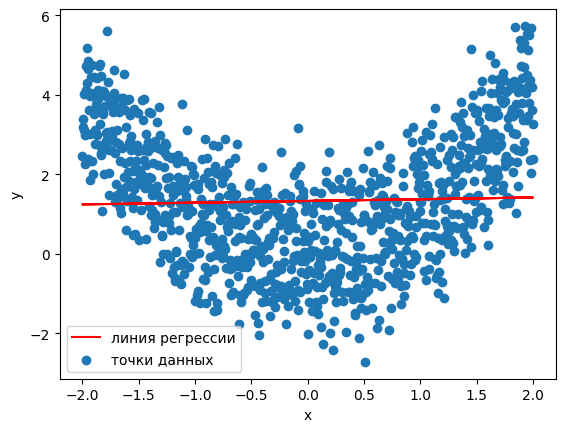

In [166]:
import matplotlib.pyplot as plt
regression_line = a * x1 + b

plt.plot(x1, regression_line,  color='red', label='линия регрессии')
plt.scatter(x1, y, label='точки данных' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

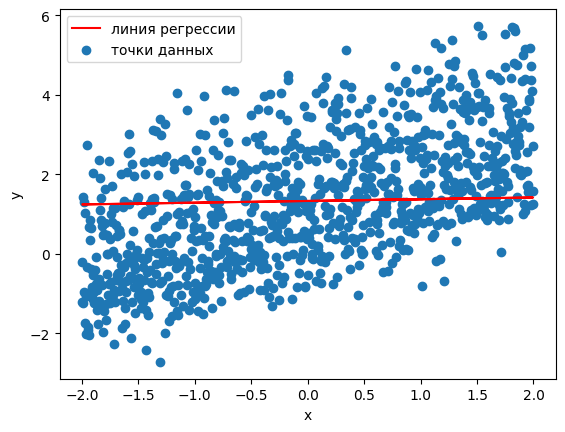

In [167]:
import matplotlib.pyplot as plt
regression_line = a * x2 + b

plt.plot(x2, regression_line,  color='red', label='линия регрессии')
plt.scatter(x2, y, label='точки данных' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

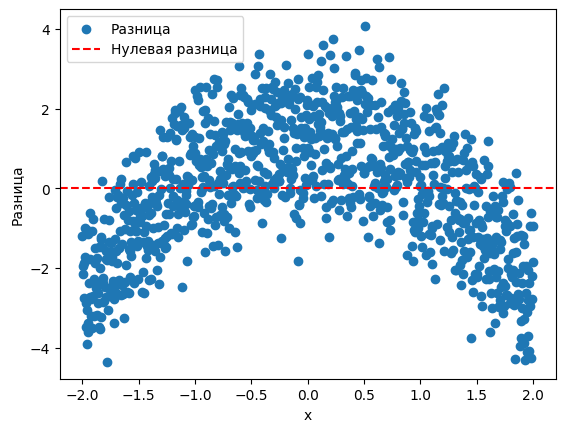

In [168]:
difference = y_predict - y

plt.scatter(x1, difference, label='Разница')
plt.axhline(y=0, color='red', linestyle='--', label='Нулевая разница')
plt.xlabel('x')
plt.ylabel('Разница')
plt.legend()
plt.show()


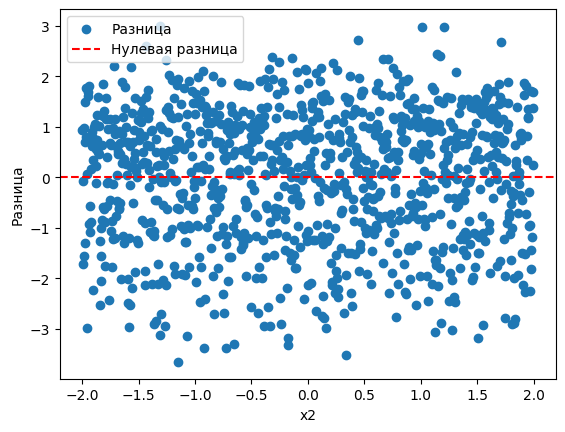

In [169]:
difference = y_predict_2 - y

plt.scatter(x2, difference, label='Разница')
plt.axhline(y=0, color='red', linestyle='--', label='Нулевая разница')
plt.xlabel('x2')
plt.ylabel('Разница')
plt.legend()
plt.show()

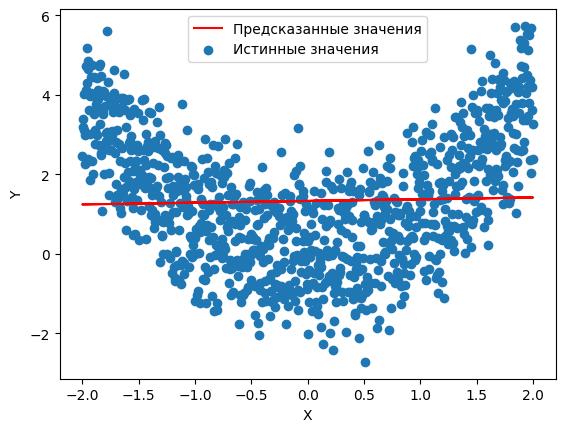

In [170]:
plt.plot(x1, y_predict, label='Предсказанные значения', color='red')
plt.scatter(x1, y, label='Истинные значения')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 2. Полиномиальная регрессия 

In [171]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2)
x2_poly = poly_features.fit_transform(x2.reshape(-1, 1))
model_poly = LinearRegression()
model_poly.fit(x2_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [172]:
y_predict_poly = model_poly.predict(x2_poly)

for  y_poly in y_predict_poly:
    print(y_poly)

2.5357039987418455
0.6104979993755283
2.0693651354001767
0.9250818563800378
1.8353164238928172
1.0703501099737347
1.8950768891007574
0.7587692869118126
2.323725466926021
0.31417382947309647
0.7484064318833643
2.7374886253106223
-0.16961532251257494
2.680103716407374
0.30966188465837274
1.768325997799992
0.46666246076044604
2.2501368814081553
2.208284707106868
1.0558804838242835
2.6425507300200866
2.117746066649537
1.772663791052053
2.8663874026689955
1.1493843100297583
2.406868106594074
1.6111877441421212
0.09660555033280915
1.974164286267487
0.524712907730397
2.676482350270886
1.523150227885586
1.5179113932918706
1.3686687268432292
1.2945250180613095
1.1635087666796462
1.6058055381516492
-0.11222593636448885
1.496757017082886
0.6697892837563291
0.43021053779556784
0.2731165562202784
2.772461143773753
0.5636589332804871
2.457502867856422
0.24957248502813667
0.33555877723185734
0.9084637966037327
1.4248006598695262
2.0660598400343604
-0.22939846632564165
0.22361884436962898
1.0302197718

In [173]:
from sklearn import metrics
print('MAE 3:', metrics.mean_absolute_error(y, y_predict_poly))
print('R2 metric 3:', metrics.r2_score(y, y_predict_poly))

MAE 3: 1.0976980473784157
R2 metric 3: 0.33327541617315803


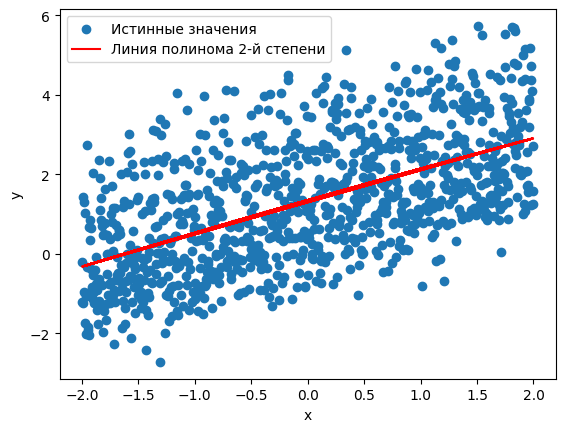

In [174]:
plt.scatter(x2, y, label='Истинные значения')
plt.plot(x2, y_predict_poly, label='Линия полинома 2-й степени', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2.498083044246978
0.6234110535014799
2.0460143660583547
0.9269929781574292
1.8329707066455534
1.072642463902836
1.888170530970506
0.7644105257812782
2.2786860259377355
0.34533053156758564
0.7544419635835846
2.76295912025295
-0.20321004355935424
2.679623489050906
0.3410148977236813
1.770199942936773
0.48888079037213406
2.2097031266691856
2.1713252346558054
1.0580127316325387
2.628895720459987
2.0894776034357125
1.7742945812342126
2.981636797048199
1.1528920098766964
2.3601312271083614
1.6190232546191416
0.12652939182162215
1.9602412514872403
0.5430589923014659
2.674607949961394
1.5320597143025907
1.5268400310750612
1.3764957462974847
1.3009937717141622
1.1672809258197758
1.6137500977419577
-0.12309506200670195
1.5057166725084647
0.6793993524369617
0.454825504746731
0.30582153018812286
2.817635792026696
0.5794670736465413
2.4123116710301726
0.2828899799807518
0.3657093255087862
0.9105311552665873
1.433367428565446
2.043045370764125
-0.29377025399457457
0.2573333954584909
1.03212642499948

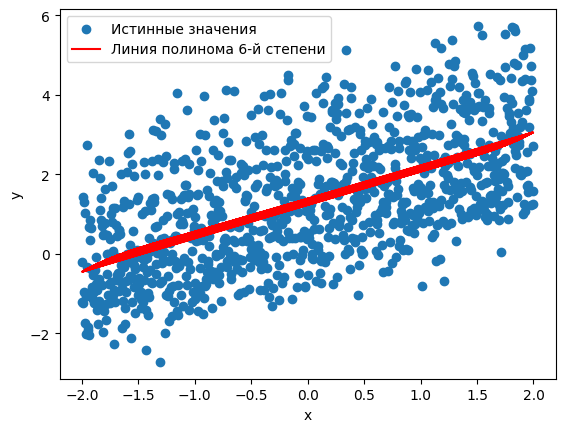

In [175]:
poly_features_6=PolynomialFeatures(degree=6)
x2_poly_6 = poly_features_6.fit_transform(x2.reshape(-1, 1))
model_poly_6 = LinearRegression()
model_poly_6.fit(x2_poly_6, y)
y_predict_poly_6 = model_poly_6.predict(x2_poly_6)

for  y_poly_6 in y_predict_poly_6:
    print(y_poly_6)

print('Mean Absolute Error 4:', metrics.mean_absolute_error(y, y_predict_poly_6))
print('R2 metric 4:', metrics.r2_score(y, y_predict_poly_6))  
plt.scatter(x2, y, label='Истинные значения')
plt.plot(x2, y_predict_poly_6, label='Линия полинома 6-й степени', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()  



2.417588606838537
0.6538819025268746
1.923026986555501
0.8831676173189956
1.7404575050835516
1.0002858148627645
1.7465327324767788
0.7763859386739389
2.483490869579526
0.3486669785217813
0.7690177869310432
2.734881256896851
-0.19718722337099437
2.4659086984852854
0.34411333581392944
1.7459580748688648
0.5069971990315997
2.3430057839209337
2.2424925169803904
0.9859901481150884
2.3796872571937118
2.0225809926203664
1.7455299023889195
3.0992706697351364
1.0914358426243573
2.542106292770324
1.7227704280662817
0.11945983367365498
1.79122629573075
0.5680663767653071
2.4544714833039247
1.652465689773286
1.6468249382574807
1.4345318186397098
1.3107539626388973
1.1100861791166852
1.7198282095357336
-0.13566120413747473
1.6225084742678164
0.7073646257620728
0.4684603408500768
0.3073559184138055
2.954793149308496
0.6079878679130999
2.5163453864839282
0.28366274756612087
0.370334353807644
0.8724233616125912
1.5237630907877893
1.9169558048885773
-0.26600189775551675
0.2573462024097726
0.96231961540

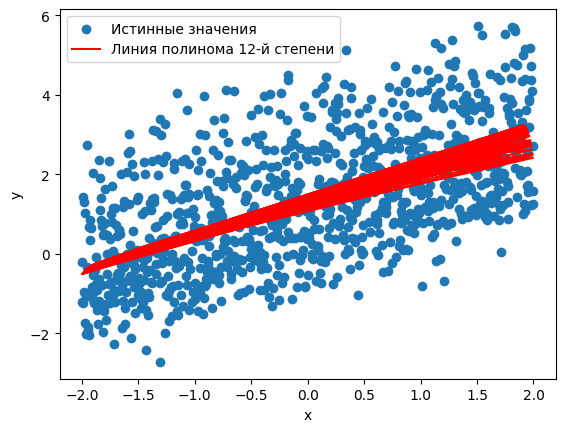

In [176]:
poly_features_12=PolynomialFeatures(degree=12)
x2_poly_12 = poly_features_12.fit_transform(x2.reshape(-1, 1))
model_poly_12 = LinearRegression()
model_poly_12.fit(x2_poly_12, y)
y_predict_poly_12 = model_poly_12.predict(x2_poly_12)

for  y_poly_12 in y_predict_poly_12:
    print(y_poly_12)

print('MAE 5:', metrics.mean_absolute_error(y, y_predict_poly_12))
print('R2 metric 5:', metrics.r2_score(y, y_predict_poly_12))  
plt.scatter(x2, y, label='Истинные значения')
plt.plot(x2, y_predict_poly_12, label='Линия полинома 12-й степени', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()  

### 3. Решение задачи регрессии различными методами

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('salary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


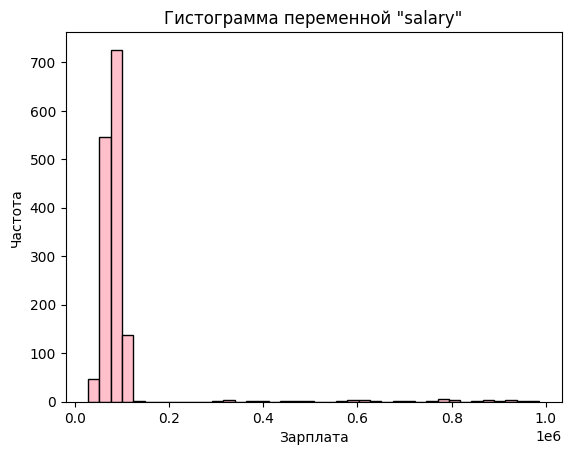

In [178]:
plt.hist(df['salary'], bins=40, color='pink', edgecolor='black')
plt.title('Гистограмма переменной "salary"')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.show()

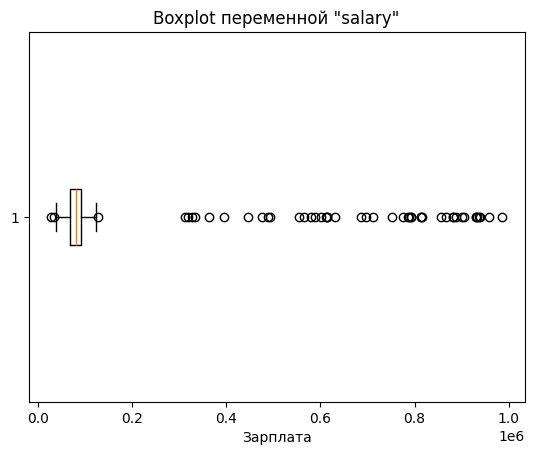

In [179]:
plt.boxplot(df['salary'], vert=False)
plt.title('Boxplot переменной "salary"')
plt.xlabel('Зарплата')
plt.show()

In [180]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_c = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]

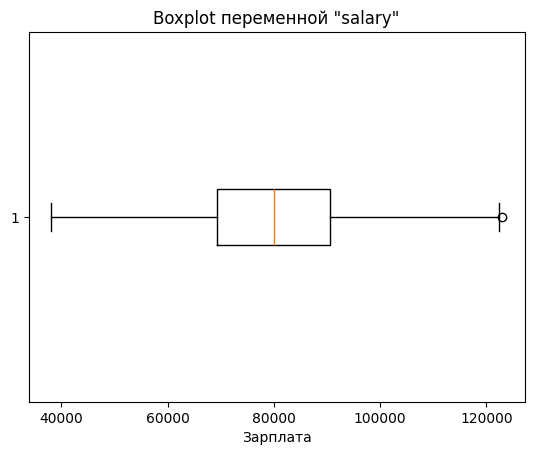

In [181]:
plt.boxplot(df_c['salary'], vert=False)
plt.title('Boxplot переменной "salary"')
plt.xlabel('Зарплата')
plt.show()

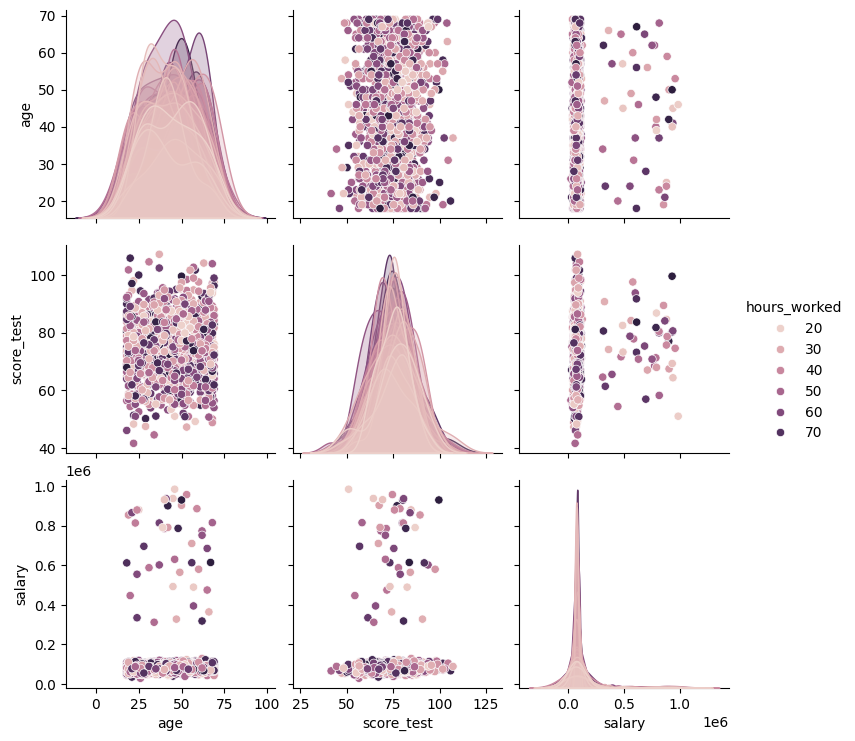

In [182]:
import seaborn as sns
sns.pairplot(df[['age','score_test', 'salary', 'hours_worked']], hue = 'hours_worked')

In [183]:
from sklearn.preprocessing import StandardScaler
numeric_columns = df_c.select_dtypes(include='number').drop(['salary'], axis=1).columns
numeric_data = df_c[numeric_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
df_c[numeric_columns] = scaled_data


C:\Users\polin\AppData\Local\Temp\ipykernel_2604\167509139.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c[numeric_columns] = scaled_data


In [184]:
from sklearn.model_selection import train_test_split
X = df_c.select_dtypes(include='number').drop (['salary'], axis=1)
Y = df_c['salary']
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.25,
    random_state=0)

In [185]:
from sklearn.linear_model import LinearRegression
model_3 = LinearRegression()
model_3.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
Y_predict = model_3.predict(X_test)

MSE6 = mean_squared_error(Y_test, Y_predict)
MAE6 = mean_absolute_error(Y_test, Y_predict)
RMSE6= np.sqrt(MSE)
R2_6 = r2_score(Y_test, Y_predict)

print("MSE:", MSE6)
print("MAE:", MAE6)
print("RMSE:", RMSE6)
print("R2:", R2_6)

MSE: 69554681.60013515
MAE: 6509.214214595931
RMSE: 1.6143906766055216
R2: 0.7031413595179865


In [187]:
df_= pd.DataFrame({'Actual': Y_test, 'Predicted':Y_predict})
df_

,Actual,Predicted
1417,38091.827270,59302.494399
502,92747.084451,93198.923631
1334,80481.558048,79461.320568
281,86092.141598,91731.089481
289,75819.406791,76205.510077
...,...,...
995,101436.866344,108928.281947
766,84790.366895,81273.338630
1445,53067.988146,59580.544751
200,81842.326574,92043.711546


In [188]:
a = model_3.coef_
b = model_3.intercept_
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient_a': a, 'Coefficient_b': b})

print(coeff_df)

            Feature  Coefficient_a  Coefficient_b
0               age     534.698266   80110.020119
1            income    7240.279657   80110.020119
2        experience   10358.538224   80110.020119
3        score_test    1249.679360   80110.020119
4      hours_worked     293.410250   80110.020119
5  distance_to_work     -75.780385   80110.020119
6           savings     130.274794   80110.020119
7              debt    -375.096228   80110.020119


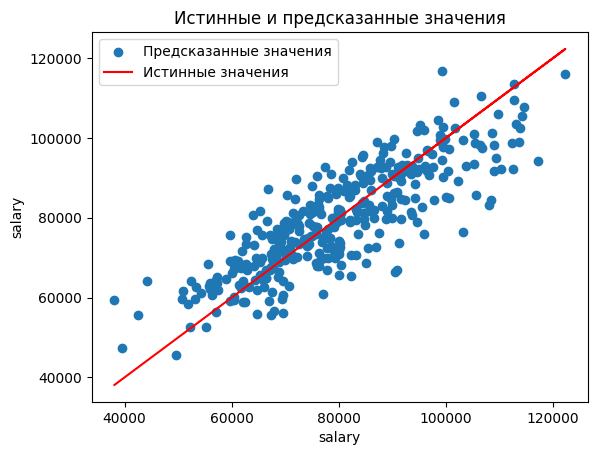

In [189]:
plt.scatter(Y_test, Y_predict, label='Предсказанные значения')
plt.plot(Y_test, Y_test, color='red', label='Истинные значения')
plt.title("Истинные и предсказанные значения")
plt.xlabel("salary")
plt.ylabel("salary")
plt.legend()
plt.show()

### Вывод